In [203]:
pip install scikit-learn==1.5.1

  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninstalled scikit-learn-1.4.1.post1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
pip install keras==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
pip install tensorflow==2.12.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import save_model

In [2]:
data = pd.read_csv('dataset_finale.csv')
data.head()

,ID,Date,commit,message,functions,User,Author,Created At,Updated At,Labels,State,Duration,Classification
0,6998,2024-06-25,186b560eb2393c7d1913f4b3e76e9e04a081e09b,Fix tests using hf-internal-testing/librispeec...,"['test_inspect_metric', 'test_inspect_dataset'...",albertvillanova,Albert Villanova del Moral,2024-06-25 07:59:44,2024-06-25 08:22:38,0,closed,0:22:54,0
1,6981,2024-06-19,a6ccf944e42c1a84de81bf326accab9999b86c90,Update docs on trust_remote_code defaults to F...,"['_delete_files', 'get_module', 'files_to_hash...",albertvillanova,Albert Villanova del Moral,2024-06-19 07:12:21,2024-06-19 14:32:59,0,closed,7:20:38,0
2,6978,2024-06-19,e47a746bcda4b97db2467542b76d3215b3569ff0,Fix regression for pandas < 2.0.0 in JSON loader,"['ujson_loads', '_split_generators', '_generat...",albertvillanova,Albert Villanova del Moral,2024-06-18 10:26:34,2024-06-19 06:23:24,0,closed,19:56:50,0
3,6975,2024-06-17,e59582adc7fcb53a86a8ca8eda7e04a4e7b25bd2,Set temporary numpy upper version < 2.0.0 to f...,[],albertvillanova,Albert Villanova del Moral,2024-06-17 10:36:54,2024-06-17 12:49:53,0,closed,2:12:59,0
4,6972,2024-06-14,5e72fb13b4824dcb27aedb807e4e28c420dec244,Fix webdataset pickling,"['xopen', 'estimate_dataset_size', '_iter_tar'...",lhoestq,Quentin Lhoest,2024-06-14 14:43:02,2024-06-14 15:43:43,0,closed,1:00:41,0


In [3]:
# Conversion de la colonne 'Date' en datetime si nécessaire
data['Date'] = pd.to_datetime(data['Date'])

# Exemple de transformation des dates en caractéristiques numériques
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Supprimer la colonne originale 'Date'
data = data.drop('Date', axis=1)

# Prétraitement de la colonne 'functions'
data['functions'] = data['functions'].apply(lambda x: ' '.join(ast.literal_eval(x)))

# Transformation des classes en binaire
def classification_to_prob(classification):
    if classification == 'BUG':
        return 1
    elif classification == '0':  # Inconnu
        return 0.5
    else:
        return 0

data['is_bug'] = data['Classification'].apply(classification_to_prob)


# Sélection des features et de la cible
features = ['Year', 'Month', 'Day', 'Author', 'message', 'functions']  
target = 'is_bug'  # La colonne que vous souhaitez prédire (BUG, ÉVOLUTION, DOCUMENTATION, etc.)

# Séparation des données en ensembles d'entraînement et de test
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
data.head()

,ID,commit,message,functions,User,Author,Created At,Updated At,Labels,State,Duration,Classification,Year,Month,Day,is_bug
0,6998,186b560eb2393c7d1913f4b3e76e9e04a081e09b,Fix tests using hf-internal-testing/librispeec...,test_inspect_metric test_inspect_dataset test_...,albertvillanova,Albert Villanova del Moral,2024-06-25 07:59:44,2024-06-25 08:22:38,0,closed,0:22:54,0,2024,6,25,0.5
1,6981,a6ccf944e42c1a84de81bf326accab9999b86c90,Update docs on trust_remote_code defaults to F...,_delete_files get_module files_to_hash get_dat...,albertvillanova,Albert Villanova del Moral,2024-06-19 07:12:21,2024-06-19 14:32:59,0,closed,7:20:38,0,2024,6,19,0.5
2,6978,e47a746bcda4b97db2467542b76d3215b3569ff0,Fix regression for pandas < 2.0.0 in JSON loader,ujson_loads _split_generators _generate_tables...,albertvillanova,Albert Villanova del Moral,2024-06-18 10:26:34,2024-06-19 06:23:24,0,closed,19:56:50,0,2024,6,19,0.5
3,6975,e59582adc7fcb53a86a8ca8eda7e04a4e7b25bd2,Set temporary numpy upper version < 2.0.0 to f...,,albertvillanova,Albert Villanova del Moral,2024-06-17 10:36:54,2024-06-17 12:49:53,0,closed,2:12:59,0,2024,6,17,0.5
4,6972,5e72fb13b4824dcb27aedb807e4e28c420dec244,Fix webdataset pickling,xopen estimate_dataset_size _iter_tar hf_githu...,lhoestq,Quentin Lhoest,2024-06-14 14:43:02,2024-06-14 15:43:43,0,closed,1:00:41,0,2024,6,14,0.5


In [5]:
print(data['is_bug'].value_counts())

is_bug
0.5    1660
0.0      22
1.0      14
Name: count, dtype: int64


In [6]:
# Définition des étapes de transformation
numeric_features = ['Year', 'Month', 'Day']
categorical_features = ['Author']
text_features = ['message', 'functions']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Utilisation de StandardScaler pour les features numériques
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Utiliser OneHotEncoder pour les features catégorielles
])


text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text_msg', text_transformer, 'message'),
        ('text_func', text_transformer, 'functions')
    ])


In [8]:
# Fonction pour entraîner et évaluer un modèle
def train_and_evaluate_model(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Sauvegarder le préprocesseur
    #joblib.dump(pipeline.named_steps['preprocessor'], 'preprocessor.pkl')

    # Entraînement du modèle
    pipeline.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # # Prédictions sur l'ensemble de test
    # y_pred_class = (y_pred >= threshold).astype(int)

    # Évaluation du modèle
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error for {model_name}: {mse}")
    print(f"R^2 Score for {model_name}: {r2}")

    #sauvegarder le modele 
    joblib.dump(pipeline, f'{model_name}.pkl')
    
    # Sauvegarder le modèle Keras séparément
    pipeline.named_steps['regressor'].model_.save(f'{model_name}.h5')
    
    # Visualisation des résultats
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
    plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
    plt.title(f'Prédictions vs Valeurs Réelles ({model_name})')
    plt.show()

    # # Matrice de confusion et rapport de classification
    # conf_matrix = confusion_matrix(y_test, y_pred_class)
    
    # print("\nMatrice de Confusion :\n", conf_matrix)
  
    # # Visualisation de la matrice de confusion
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Régression', 'Régression'], yticklabels=['Non Régression', 'Régression'])
    # plt.xlabel('Prédictions')
    # plt.ylabel('Valeurs Réelles')
    # plt.title('Matrice de Confusion')
    # plt.show()



Mean Squared Error for LinearRegression: 0.018431976597331708
R^2 Score for LinearRegression: -2.582575022533075


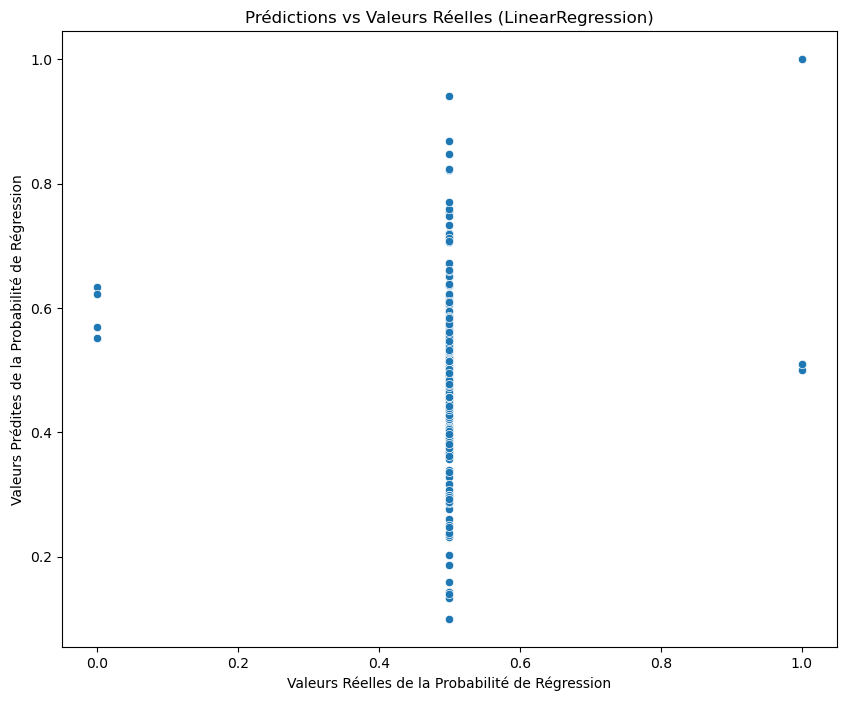

In [135]:
# Entraîner et évaluer régression linéaire
LinearRegression_model = LinearRegression(random_state=42)
train_and_evaluate_model(LinearRegression_model, "LinearRegression")

Epoch 1/200
136/136 [==============================] - 2s 6ms/step - loss: 0.0514 - mse: 0.0514
Epoch 2/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0191 - mse: 0.0191
Epoch 3/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0149 - mse: 0.0149
Epoch 4/200
136/136 [==============================] - 1s 6ms/step - loss: 0.0113 - mse: 0.0113
Epoch 5/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0095 - mse: 0.0095
Epoch 6/200
136/136 [==============================] - 1s 6ms/step - loss: 0.0082 - mse: 0.0082
Epoch 7/200
136/136 [==============================] - 1s 5ms/step - loss: 0.0080 - mse: 0.0080
Epoch 8/200
136/136 [==============================] - 1s 5ms/step - loss: 0.0073 - mse: 0.0073
Epoch 9/200
136/136 [==============================] - 1s 7ms/step - loss: 0.0066 - mse: 0.0066
Epoch 10/200
136/136 [==============================] - 1s 6ms/step - loss: 0.0058 - mse: 0.0058
Epoch 11/200
136/136 [=================

INFO:tensorflow:Assets written to: C:\Users\Mabrouk\AppData\Local\Temp\tmpxwhm1hk0\assets


INFO:tensorflow:Assets written to: C:\Users\Mabrouk\AppData\Local\Temp\tmpxwhm1hk0\assets


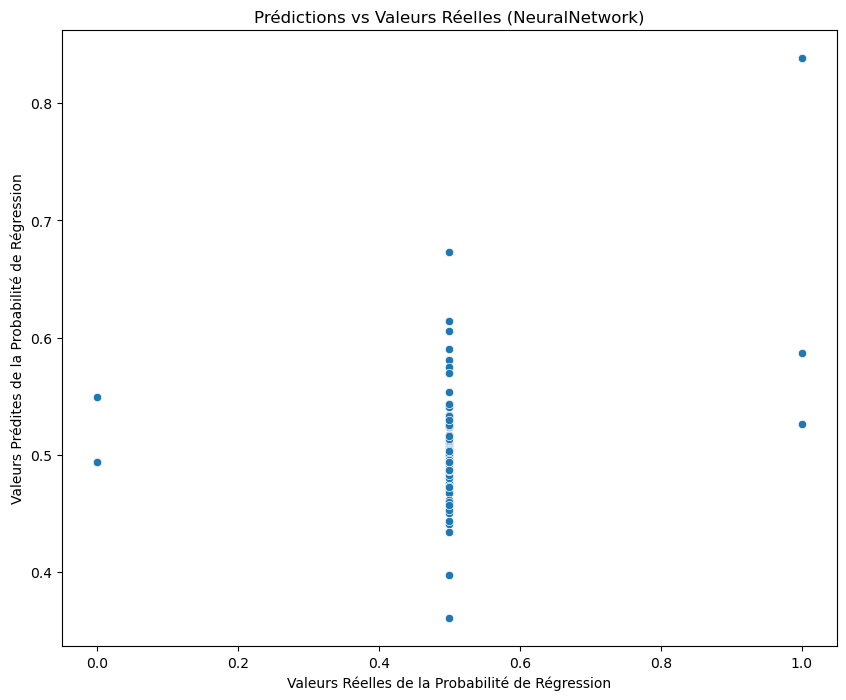

In [13]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(preprocessor.fit_transform(X_train).shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='linear')  # Couche de sortie avec activation linéaire pour la régression
])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model
    


#Utilisation de KerasRegressor pour intégrer le modèle dans un pipeline scikit-learn
neural_network = KerasRegressor(model=create_model, epochs=200, batch_size=10, verbose=1,random_state=42)


train_and_evaluate_model(neural_network, "NeuralNetwork")

In [174]:
# Fonction pour entraîner et évaluer un modèle
def train_and_evaluate_model_with_Grid(model, model_name, param_grid):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Utilisation de GridSearchCV pour la recherche d'hyperparamètres
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_

    # Prédictions sur l'ensemble de test
    y_pred = best_model.predict(X_test)

    # Évaluation du modèle
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Mean Squared Error for {model_name}: {mse}")
    print(f"R^2 Score for {model_name}: {r2}")
    
    #sauvegarder le modele 
    joblib.dump(best_model, f'{model_name}.pkl')
    
    # Visualisation des résultats
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
    plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
    plt.title(f'Prédictions vs Valeurs Réelles ({model_name})')
    plt.show()

Best parameters for LassoRegression: {'regressor__alpha': 0.1}
Mean Squared Error for LassoRegression: 0.005146129476668626
R^2 Score for LassoRegression: -0.00023970996703370773


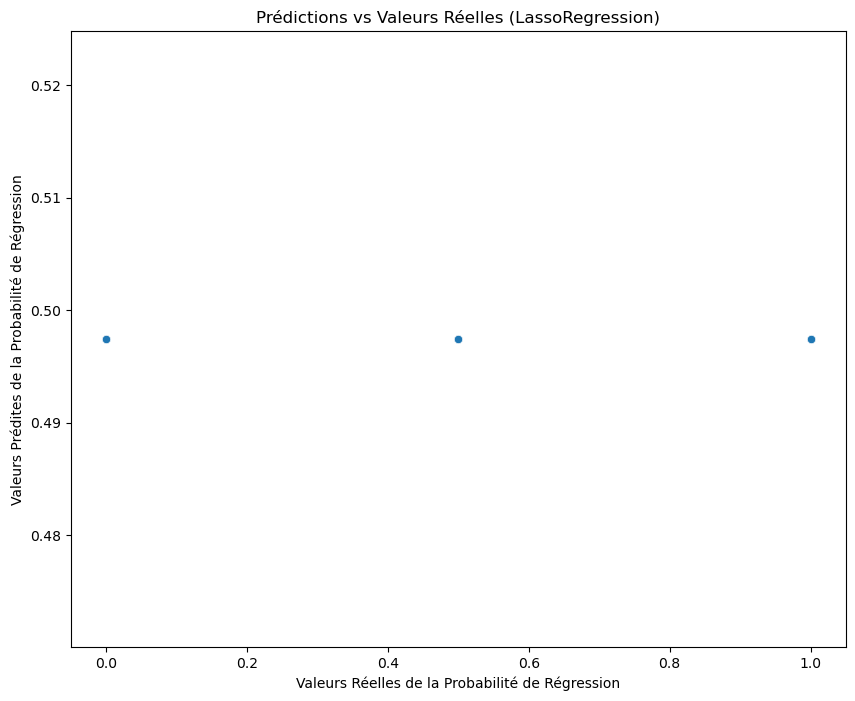

In [175]:
# Entraîner et évaluer Lasso
lasso_params = {
    'regressor__alpha': [0.1, 1.0, 10.0]
}

lasso_model = Lasso(random_state=42)
train_and_evaluate_model_with_Grid(lasso_model, "LassoRegression",lasso_params)

Best parameters for RidgeRegression: {'regressor__alpha': 10.0}
Mean Squared Error for RidgeRegression: 0.005099310056238204
R^2 Score for RidgeRegression: 0.008860458173793107


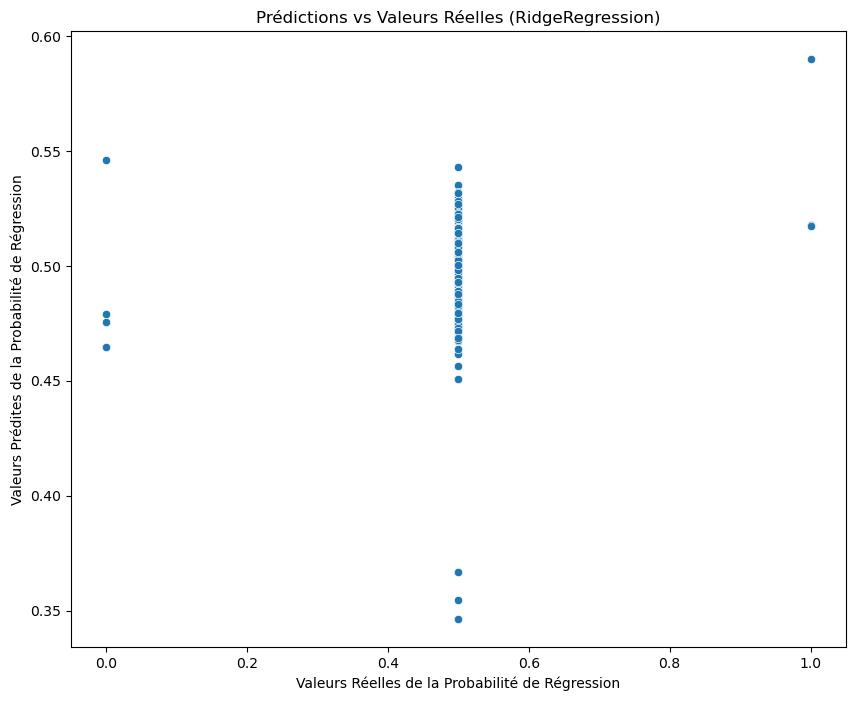

In [176]:
# Entraîner et évaluer Ridge
ridge_params = {
    'regressor__alpha': [0.1, 1.0, 10.0,100.0]
}
ridge_model = Ridge(random_state=42)
train_and_evaluate_model_with_Grid(ridge_model, "RidgeRegression", ridge_params)


Best parameters for RandomForest: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
Mean Squared Error for RandomForest: 0.0055793366031992725
R^2 Score for RandomForest: -0.08444104469077107


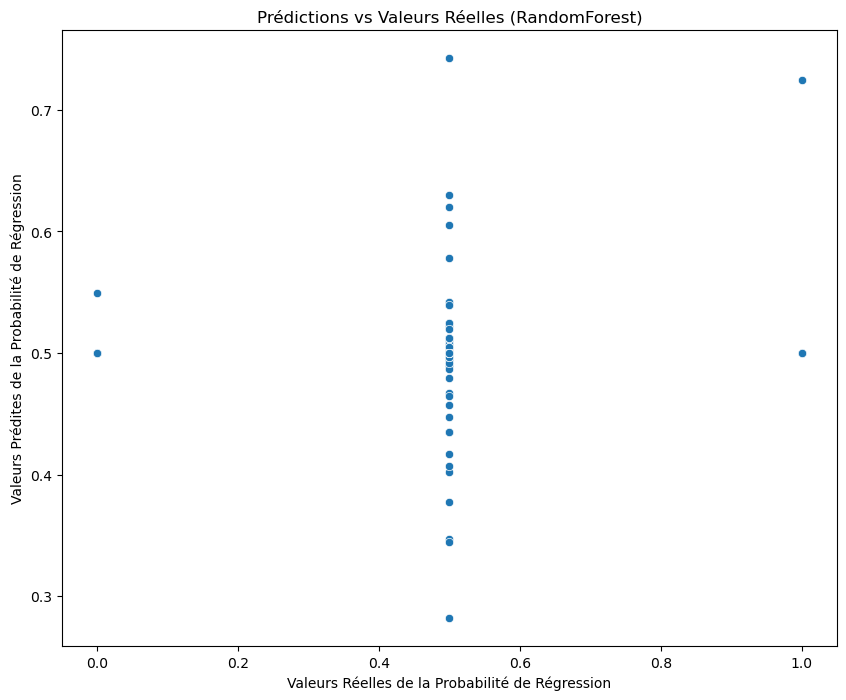

In [177]:
rf_params = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20]
}
RandomForest_model = RandomForestRegressor(random_state=42)
train_and_evaluate_model_with_Grid(RandomForest_model, "RandomForest", rf_params)


C:\Users\Mabrouk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1580 - mse: 0.1580 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0101 -

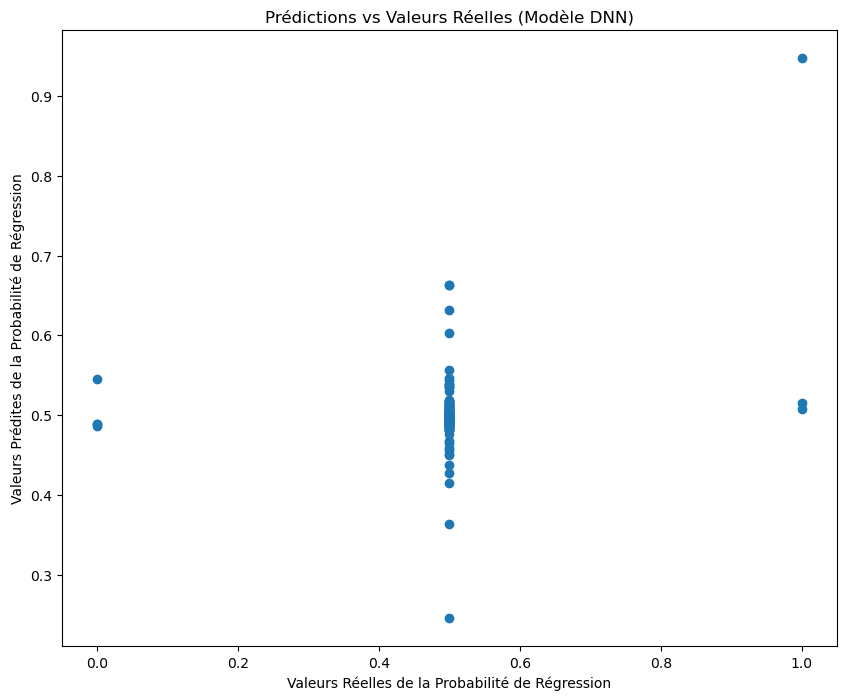

In [154]:
# def create_model():
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(preprocessor.fit_transform(X_train).shape[1],)),
#         Dropout(0.5),
#         Dense(32, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='linear')  # Couche de sortie avec activation linéaire pour la régression
# ])
#     model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
#     return model

# #Utilisation de KerasRegressor pour intégrer le modèle dans un pipeline scikit-learn
# neural_network = KerasRegressor(build_fn=create_model, epochs=50, batch_size=10, verbose=1,random_state=42)


# # Prétraitement des données
# X_train_processed = preprocessor.fit_transform(X_train)
# X_test_processed = preprocessor.transform(X_test)

# # Construction du modèle DNN
# model = Sequential([
#         Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
#         Dropout(0.5),
#         Dense(32, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='linear')  # Couche de sortie avec activation linéaire pour la régression
# ])

# # Compilation du modèle
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


# # Entraînement du modèle
# history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_test_processed, y_test))

# # Évaluation du modèle
# mse = model.evaluate(X_test_processed, y_test)
# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score : {r2}")
# # Prédictions sur l'ensemble de test
# y_pred = model.predict(X_test_processed)

# # Visualisation des résultats
# plt.figure(figsize=(10, 8))
# plt.scatter(y_test, y_pred)
# plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
# plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
# plt.title('Prédictions vs Valeurs Réelles (Modèle DNN)')
# plt.show()

In [ ]:
# # Modèle de régression linéaire
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])
# # Entraînement du modèle
# pipeline.fit(X_train, y_train)
# # Prédictions sur l'ensemble de test
# y_pred = pipeline.predict(X_test)
# # Évaluation du modèle
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error (regression lineaire):", mse)
# r2 = r2_score(y_test, y_pred)
# print("R^2 Score for (regression lineaire):", r2)
# # Visualisation des résultats
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
# plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
# plt.title('Prédictions vs Valeurs Réelles')
# plt.show()



# # Modèle de régression Ridge
# ridge_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', Ridge())
# ])
# # Recherche des meilleurs hyperparamètres pour Ridge
# ridge_params = {
#     'regressor__alpha': [0.1, 1.0, 10.0]
# }
# ridge_search = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
# ridge_search.fit(X_train, y_train)
# # Meilleur modèle Ridge
# best_ridge = ridge_search.best_estimator_
# # Prédictions sur l'ensemble de test pour Ridge
# y_pred_ridge = best_ridge.predict(X_test)
# # Évaluation des modèles
# mse_ridge = mean_squared_error(y_test, y_pred_ridge)
# print("Mean Squared Error (Ridge):", mse_ridge)
# r2 = r2_score(y_test, y_pred_ridge)
# print("R^2 Score for (Ridge):", r2)
# # Visualisation des résultats pour Ridge
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=y_test, y=y_pred_ridge)
# plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
# plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
# plt.title('Prédictions vs Valeurs Réelles (Ridge)')
# plt.show()



# # Modèle de régression Lasso
# lasso_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', Lasso())
# ])
# # Recherche des meilleurs hyperparamètres pour Lasso
# lasso_params = {
#     'regressor__alpha': [0.1, 1.0, 10.0]
# }
# lasso_search = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error')
# lasso_search.fit(X_train, y_train)
# # Meilleur modèle Lasso
# best_lasso = lasso_search.best_estimator_
# # Prédictions sur l'ensemble de test pour Lasso
# y_pred_lasso = best_lasso.predict(X_test)
# # Évaluation des modèles
# mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# print("Mean Squared Error (Lasso):", mse_lasso)
# r2 = r2_score(y_test, y_pred_lasso)
# print("R^2 Score for (Lasso):", r2)
# # Visualisation des résultats pour Lasso
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=y_test, y=y_pred_lasso)
# plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
# plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
# plt.title('Prédictions vs Valeurs Réelles (Lasso)')
# plt.show()


# # Modèle de régression Random Forest
# rf_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(random_state=42))
# ])
# # Recherche des meilleurs hyperparamètres pour Random Forest
# rf_params = {
#     'regressor__n_estimators': [50, 100, 200],
#     'regressor__max_depth': [None, 10, 20]
# }
# rf_search = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='neg_mean_squared_error')
# rf_search.fit(X_train, y_train)
# # Meilleur modèle Random Forest
# best_rf = rf_search.best_estimator_
# # Prédictions sur l'ensemble de test pour Random Forest
# y_pred_rf = best_rf.predict(X_test)
# # Évaluation du modèle Random Forest
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# print("Mean Squared Error (Random Forest):", mse_rf)
# r2 = r2_score(y_test, y_pred_rf)
# print("R^2 Score for (Random Forest):", r2)
# # Visualisation des résultats pour Random Forest
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=y_test, y=y_pred_rf)
# plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
# plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
# plt.title('Prédictions vs Valeurs Réelles (Random Forest)')
# plt.show()


# # # Prétraitement des données
# # X_train_processed = preprocessor.fit_transform(X_train)
# # X_test_processed = preprocessor.transform(X_test)

# # # Construction du modèle DNN
# # model = Sequential([
# #         Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
# #         Dropout(0.5),
# #         Dense(32, activation='relu'),
# #         Dropout(0.3),
# #         Dense(1, activation='linear')  # Couche de sortie avec activation linéaire pour la régression
# # ])

# # # Compilation du modèle
# # model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


# # # Entraînement du modèle
# # history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_test_processed, y_test))

# # # Évaluation du modèle
# # mse = model.evaluate(X_test_processed, y_test)
# # print(f"Mean Squared Error: {mse}")

# # # Prédictions sur l'ensemble de test
# # y_pred = model.predict(X_test_processed)

# # # Visualisation des résultats
# # plt.figure(figsize=(10, 8))
# # plt.scatter(y_test, y_pred)
# # plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
# # plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
# # plt.title('Prédictions vs Valeurs Réelles (Modèle DNN)')
# # plt.show()
# def create_model():
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(preprocessor.fit_transform(X_train).shape[1],)),
#         Dropout(0.5),
#         Dense(32, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='linear')  # Couche de sortie avec activation linéaire pour la régression
# ])
#     model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
#     return model
# #Utilisation de KerasRegressor pour intégrer le modèle dans un pipeline scikit-learn
# neural_network = KerasRegressor(build_fn=create_model, epochs=50, batch_size=10, verbose=1)
# # Création du pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('neural_network', neural_network)
# ])
# # Entraînement du pipeline
# pipeline.fit(X_train, y_train)
# # Prédictions sur l'ensemble de test
# y_pred = pipeline.predict(X_test)
# # Évaluation du modèle
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("Mean Squared Error (Neural Network):", mse)
# print("R^2 Score for (Neural Network):", r2)
# # Visualisation des résultats
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.xlabel('Valeurs Réelles de la Probabilité de Régression')
# plt.ylabel('Valeurs Prédites de la Probabilité de Régression')
# plt.title('Prédictions vs Valeurs Réelles')
# plt.show()